# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:

# Import libraries
import yfinance as yf
import dataprojectyf as dp

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


# Read and clean data

Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

In [43]:
# a. fetch the data for the house representatives
house_raw = dp.fetch_data(print_df = True)

# b. fech example data from yfinance
example_yf = yf.download("AAPL", "2022-03-01", "2022-03-14", interval="1d")

display(example_yf)


request successful


,date,ticker,amount,action,representative,party,description
0,2021-09-27,BP,"$1,001 - $15,000",purchase,Virginia Foxx,Republican,BP plc
1,2021-09-13,XOM,"$1,001 - $15,000",purchase,Virginia Foxx,Republican,Exxon Mobil Corporation
2,2021-09-10,ILPT,"$15,001 - $50,000",purchase,Virginia Foxx,Republican,Industrial Logistics Properties Trust - Common...
3,2021-09-28,PM,"$15,001 - $50,000",purchase,Virginia Foxx,Republican,Phillip Morris International Inc
4,2021-09-17,BLK,"$1,001 - $15,000",sale_partial,Alan S. Lowenthal,Democrat,BlackRock Inc
...,...,...,...,...,...,...,...
16943,2020-04-09,SWK,"$1,001 - $15,000",sale_partial,Ed Perlmutter,Democrat,"Stanley Black & Decker, Inc."
16944,2020-04-09,USB,"$1,001 - $15,000",sale_partial,Ed Perlmutter,Democrat,U.S. Bancorp
16945,2020-03-13,BMY,"$100,001 - $250,000",sale_full,Van Taylor,Republican,Bristol-Myers Squibb Company
16946,2020-03-13,LLY,"$500,001 - $1,000,000",sale_full,Van Taylor,Republican,Eli Lilly and Company


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-01,164.699997,166.600006,161.970001,163.199997,162.217331,83474400
2022-03-02,164.389999,167.360001,162.949997,166.559998,165.557098,79724800
2022-03-03,168.470001,168.910004,165.550003,166.229996,165.229095,76678400
2022-03-04,164.490005,165.550003,162.100006,163.169998,162.187515,83737200
2022-03-07,163.360001,165.020004,159.039993,159.300003,158.340820,96418800
2022-03-08,158.820007,162.880005,155.800003,157.440002,156.492020,131148300
2022-03-09,161.479996,163.410004,159.410004,162.949997,161.968842,91454900
2022-03-10,160.199997,160.389999,155.979996,158.520004,157.565521,105342000
2022-03-11,158.929993,159.279999,154.500000,154.729996,153.798340,96970100


# Clean House data

In [45]:
# a. clean the data
house_clean = dp.clean_data(house_raw, print_df = True)


12 invalid dates dropped
1710 invalid tickers dropped
75 options trades dropped


,date,ticker,action,representative,party,description,min_amount,max_amount,amount
0,2021-06-01,LHX,purchase,Abigail Spanberger,dem,L3Harris Special Stock Grant,1001.0,15000.0,8000.5
1,2022-09-01,LHX,purchase,Abigail Spanberger,dem,L3Harris Technolgies - Spouse granted RSU as p...,1001.0,15000.0,8000.5
2,2023-03-02,LHX,sale_full,Abigail Spanberger,dem,L3Harris Technologies Inc,1001.0,15000.0,8000.5
3,2020-07-06,AAPL,sale_full,Adam B. Schiff,dem,Apple Inc,1001.0,15000.0,8000.5
4,2021-07-23,ABBV,sale_partial,Adam B. Schiff,dem,AbbVie Inc,1001.0,15000.0,8000.5
...,...,...,...,...,...,...,...,...,...
15146,2020-03-23,WPC,sale_full,Zoe Lofgren,dem,W. P. Carey Inc. REIT,1001.0,15000.0,8000.5
15147,2020-03-23,XEL,sale_full,Zoe Lofgren,dem,Xcel Energy Inc.,1001.0,15000.0,8000.5
15148,2020-03-23,ZTS,sale_full,Zoe Lofgren,dem,Zoetis Inc. Class A,1001.0,15000.0,8000.5
15149,2021-08-09,ZTS,purchase,Zoe Lofgren,dem,Zoetis Inc Class A,1001.0,15000.0,8000.5


# Merge data sets

- First we narrow down our dataset to only look at 1 representative with ```dp.select_rep```. This function filters down the data to the chosen representative.
- Next we create a list of all stock tickers in the filtered data and 

In [4]:
rep_df = dp.select_rep(house_clean, "Nancy Pelosi", print_df = True)


,date,ticker,action,representative,party,description,min_amount,max_amount,amount
0,2020-05-08,AAPL,sale_partial,Nancy Pelosi,dem,Apple Inc.,500001.0,1000000.0,750000.5
1,2020-05-08,AAPL,sale_partial,Nancy Pelosi,dem,Apple Inc.,500001.0,1000000.0,750000.5
2,2020-05-08,AAPL,sale_partial,Nancy Pelosi,dem,Apple Inc.,1000001.0,5000000.0,3000000.5
3,2020-06-18,AAPL,sale_full,Nancy Pelosi,dem,Apple Inc.,1000001.0,5000000.0,3000000.5
4,2020-11-06,AAPL,sale_partial,Nancy Pelosi,dem,Apple Inc.,500001.0,1000000.0,750000.5
5,2021-05-21,AAPL,purchase,Nancy Pelosi,dem,Apple Inc,100001.0,250000.0,175000.5
6,2021-12-30,AAPL,sale_partial,Nancy Pelosi,dem,Apple Inc - Contribution of 3K shares held per...,500001.0,1000000.0,750000.5
7,2021-12-30,AAPL,sale_partial,Nancy Pelosi,dem,Apple Inc - Contribution of 3K shares held per...,500001.0,1000000.0,750000.5
8,2020-12-22,AB,purchase,Nancy Pelosi,dem,"AllianceBernstein Holding plc Purchsed 20,000 ...",500001.0,1000000.0,750000.5
9,2021-02-18,AB,purchase,Nancy Pelosi,dem,"AllianceBerstein Holding LP. Purchased 15,000 ...",500001.0,1000000.0,750000.5


In [5]:
stocks_price = dp.get_stock_data(rep_df)

[*********************100%***********************]  22 of 22 completed

1 Failed download:
- WORK: No timezone found, symbol may be delisted


In [6]:
display(stocks_price)

,AAPL,AB,AMZN,AXP,CRM,CRWD,DIS,GOOG,GOOGL,IBKR,...,MSFT,MU,NFLX,NVDA,PYPL,RBLX,TSLA,V,WBD,WORK
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-20,78.513969,27.180935,107.654999,130.456650,193.360001,63.380001,140.369995,75.907501,75.849503,55.826645,...,179.330414,58.285522,386.000000,76.895653,122.430000,NaN,59.960667,207.199646,29.980000,NaN
2020-02-21,76.736816,26.504711,104.798500,128.851990,189.500000,60.930000,138.970001,74.255501,74.172997,53.907001,...,173.661285,56.299866,380.070007,73.251396,119.489998,NaN,60.066666,204.612701,29.209999,NaN
2020-02-24,73.091766,25.665268,100.464500,122.442825,185.940002,58.080002,133.009995,71.079498,70.992996,52.839428,...,166.173828,54.343842,368.700012,68.072693,116.440002,NaN,55.585999,194.794113,28.309999,NaN
2020-02-25,70.616005,25.144499,98.637001,115.479652,181.270004,57.740002,128.190002,69.422501,69.316002,51.203800,...,163.431671,51.469078,360.089996,65.275368,109.660004,NaN,53.327332,184.612930,27.420000,NaN
2020-02-26,71.736229,24.911324,98.979500,113.187248,178.869995,58.459999,123.360001,69.658997,69.523499,52.947163,...,165.473694,51.735806,379.239990,66.670288,109.110001,NaN,51.919998,183.446884,26.469999,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-03,166.169998,35.700001,102.410004,163.175491,196.490005,136.550003,99.760002,104.910004,104.360001,82.430000,...,287.230011,59.489777,348.279999,279.649994,75.290001,46.419998,194.770004,229.000000,14.810000,NaN
2023-04-04,165.630005,34.810001,103.949997,161.959991,197.199997,136.860001,99.570000,105.120003,104.720001,80.940002,...,287.179993,57.154495,346.750000,274.529999,75.260002,46.290001,192.580002,227.660004,15.150000,NaN
2023-04-05,163.759995,34.119999,101.099998,161.080002,195.309998,127.800003,99.910004,104.949997,104.470001,80.050003,...,284.339996,56.904999,342.350006,268.809998,73.610001,45.389999,185.520004,228.169998,14.790000,NaN


In [16]:
df_merge = dp.merge_data(rep_df, stocks_price, print_df = True)

# filter to only include AAPL
#dan_merge = dan_merge[dan_merge["ticker"] == "TSLA"]

# filtering to november 2021 only
#dan_merge = dan_merge[dan_merge["date"] >= "2021-11-08"]
#dan_merge = dan_merge[dan_merge["date"] <= "2021-11-16"]

df_merge.info()

,date,ticker,price,action,amount
0,2021-05-21,AAPL,124.148643,purchase,175000.5
1,2021-05-24,AAPL,125.801582,none,NaN
2,2021-05-25,AAPL,125.603622,none,NaN
3,2021-05-26,AAPL,125.554138,none,NaN
4,2021-05-27,AAPL,124.000175,none,NaN
...,...,...,...,...,...
8223,2023-04-03,RBLX,46.419998,none,NaN
8224,2023-04-04,RBLX,46.290001,none,NaN
8225,2023-04-05,RBLX,45.389999,none,NaN
8226,2023-04-06,RBLX,46.200001,none,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8228 entries, 0 to 8227
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8228 non-null   datetime64[ns]
 1   ticker  8228 non-null   string        
 2   price   8228 non-null   float64       
 3   action  8228 non-null   string        
 4   amount  35 non-null     float64       
dtypes: datetime64[ns](1), float64(2), string(2)
memory usage: 321.5 KB


In [17]:
portfolio = dp.portfolio(df_merge)

display(portfolio)

,date,ticker,price,action,amount,share_change,shares_owned,daily_return,value_ticker,value_portfolio,weight_ticker,weighted_return,portfolio_return
0,2021-05-21,AAPL,124.148643,purchase,175000.5,1409,1409,NaN,174925.438683,1.871055e+07,0.009349,NaN,0.004044
1,2021-05-24,AAPL,125.801582,none,NaN,0,1409,0.013314,177254.429512,1.909833e+07,0.009281,0.000124,0.020979
2,2021-05-25,AAPL,125.603622,none,NaN,0,1409,-0.001574,176975.504013,1.910300e+07,0.009264,-0.000015,0.000276
3,2021-05-26,AAPL,125.554138,none,NaN,0,1409,-0.000394,176905.780701,1.925431e+07,0.009188,-0.000004,0.007985
4,2021-05-27,AAPL,124.000175,none,NaN,0,1409,-0.012377,174716.247246,1.926294e+07,0.009070,-0.000112,0.000942
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,2023-04-03,RBLX,46.419998,none,NaN,0,5396,0.032014,250482.310120,1.334236e+07,0.018773,0.000601,-0.004240
8224,2023-04-04,RBLX,46.290001,none,NaN,0,5396,-0.002800,249780.844940,1.334111e+07,0.018723,-0.000052,-0.000014
8225,2023-04-05,RBLX,45.389999,none,NaN,0,5396,-0.019443,244924.436707,1.317440e+07,0.018591,-0.000361,-0.012273
8226,2023-04-06,RBLX,46.200001,none,NaN,0,5396,0.017845,249295.204117,1.335361e+07,0.018669,0.000333,0.014042


In [18]:
# export the data
portfolio.to_csv("df.csv")

In [35]:
daily_return = dp.daily_return(portfolio)
display(daily_return)

,weighted_return
date,
2020-02-20,0.000000
2020-02-21,-0.031613
2020-02-24,-0.043115
2020-02-25,-0.016502
2020-02-26,0.012495
...,...
2023-04-03,-0.004240
2023-04-04,-0.000014
2023-04-05,-0.012273


[*********************100%***********************]  1 of 1 completed


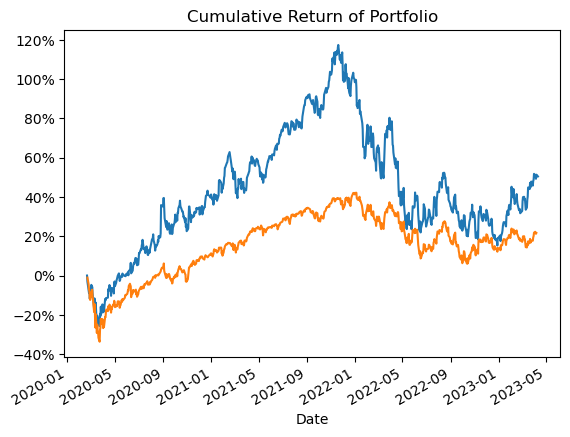

In [40]:
dp.plot_return(daily_return, include_sp500=True)

# Analysis

# Conclusion